<a href="https://colab.research.google.com/github/John-Richard-Bercades/-CSST106-4B/blob/main/4B_BERCADES_MP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MACHINE PROBLEM 5


#TASK 1: MODEL LOADING

> Add blockquote



In [2]:
!wget https://pjreddie.com/media/files/yolov3.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg


--2024-12-06 01:21:39--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  39.1MB/s    in 6.4s    

2024-12-06 01:21:45 (37.1 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2024-12-06 01:21:45--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2

#### TASK 2: IMAGE INPUT

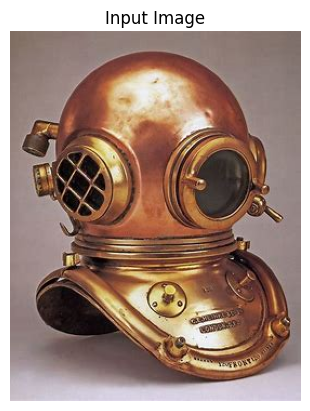

In [3]:
#Import Libraries.
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

#Load the image.
def load_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image not found at path: {image_path}")
    return image

#Image path.
image_path = '/content/IMAGE4.jfif'
image = load_image(image_path)

#Display the image.
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Input Image')
plt.show()

#TASK 3: OBJECT DETECTION

In [5]:
def detect_objects_yolo(image):
    height, width = image.shape[:2]

    #Preprocess the image for YOLO.
    blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)

    #Run forward pass to get detection results.
    detections = net.forward(output_layers)

    #Initialize lists for detected bounding boxes, confidences, and class IDs.
    boxes = []
    confidences = []
    class_ids = []

    #Process each detection.
    for output in detections:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                #Scale bounding box coordinates to original image size.
                box = detection[0:4] * np.array([width, height, width, height])
                (center_x, center_y, w, h) = box.astype("int")
                x = int(center_x - (w / 2))
                y = int(center_y - (h / 2))

                #Append to lists.
                boxes.append([x, y, int(w), int(h)])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    return boxes, confidences, class_ids

#TASK 4: VISUALIZATION

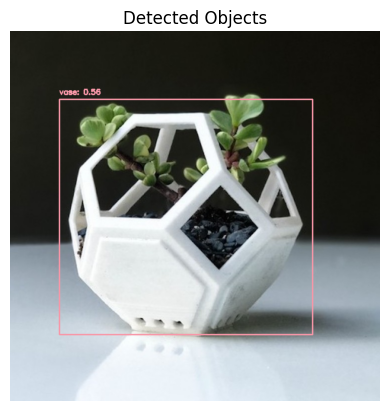

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define classes (COCO dataset example)
classes = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat",
           "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat",
           "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack",
           "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball",
           "kite", "baseball bat", "baseball glove", "skateboard", "surfboard", "tennis racket",
           "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple",
           "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake",
           "chair", "sofa", "potted plant", "bed", "dining table", "toilet", "TV monitor",
           "laptop", "mouse", "remote", "keyboard", "cell phone", "microwave", "oven", "toaster",
           "sink", "refrigerator", "book", "clock", "vase", "scissors", "teddy bear", "hair drier",
           "toothbrush"]

# Generate random colors for each class
np.random.seed(42)
colors = np.random.randint(0, 255, size=(len(classes), 3), dtype='uint8')

# Paths to YOLO weights and config files
yolo_weights = "/content/yolov3.weights"  # Replace with the actual path
yolo_config = "/content/yolov3.cfg"       # Replace with the actual path

# Load YOLO model
net = cv2.dnn.readNet(yolo_weights, yolo_config)

# Get the names of all layers in the YOLO model
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers().flatten()]

def detect_and_draw_boxes(image, confidence_threshold=0.5, nms_threshold=0.4):
    """Detect objects in an image and draw bounding boxes."""
    height, width = image.shape[:2]

    # Preprocess the image for YOLO
    blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)

    # Run forward pass to get detection results
    detections = net.forward(output_layers)

    # Initialize lists for detected bounding boxes, confidences, and class IDs
    boxes = []
    confidences = []
    class_ids = []

    # Process each detection
    for output in detections:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > confidence_threshold:
                # Scale bounding box coordinates to original image size
                box = detection[0:4] * np.array([width, height, width, height])
                (center_x, center_y, w, h) = box.astype("int")
                x = int(center_x - (w / 2))
                y = int(center_y - (h / 2))

                # Append to lists
                boxes.append([x, y, int(w), int(h)])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Apply Non-Maximum Suppression (NMS)
    indices = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=confidence_threshold, nms_threshold=nms_threshold)

    # Draw bounding boxes and labels on the image
    for i in indices.flatten():
        x, y, w, h = boxes[i]
        color = [int(c) for c in colors[class_ids[i]]]
        label = f"{classes[class_ids[i]]}: {confidences[i]:.2f}"

        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    return image

# Load an image for object detection
image_path = "/content/IMAGE5.jpg"
image = cv2.imread(image_path)

# Ensure the image is loaded correctly
if image is None:
    raise FileNotFoundError(f"Image not found at path: {image_path}")

# Detect objects and draw boxes
output_image = detect_and_draw_boxes(image.copy())

# Display the output image
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Detected Objects")
plt.show()


#### **TASK 5: Testing**

In [13]:
def detect_and_draw_boxes(image, confidence_threshold=0.5, nms_threshold=0.4):
    """Detect objects in an image and draw bounding boxes."""
    height, width = image.shape[:2]

    # Preprocess the image for YOLO
    blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)

    # Run forward pass to get detection results
    detections = net.forward(output_layers)

    # Initialize lists for detected bounding boxes, confidences, and class IDs
    boxes = []
    confidences = []
    class_ids = []

    # Process each detection
    for output in detections:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > confidence_threshold:
                # Scale bounding box coordinates to original image size
                box = detection[0:4] * np.array([width, height, width, height])
                (center_x, center_y, w, h) = box.astype("int")
                x = int(center_x - (w / 2))
                y = int(center_y - (h / 2))

                # Append to lists
                boxes.append([x, y, int(w), int(h)])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Apply Non-Maximum Suppression (NMS)
    indices = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=confidence_threshold, nms_threshold=nms_threshold)

    # Draw bounding boxes and labels on the image if indices are not empty
    if len(indices) > 0:
        for i in indices.flatten():
            x, y, w, h = boxes[i]
            color = [int(c) for c in colors[class_ids[i]]]
            label = f"{classes[class_ids[i]]}: {confidences[i]:.2f}"

            cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
            cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    return image


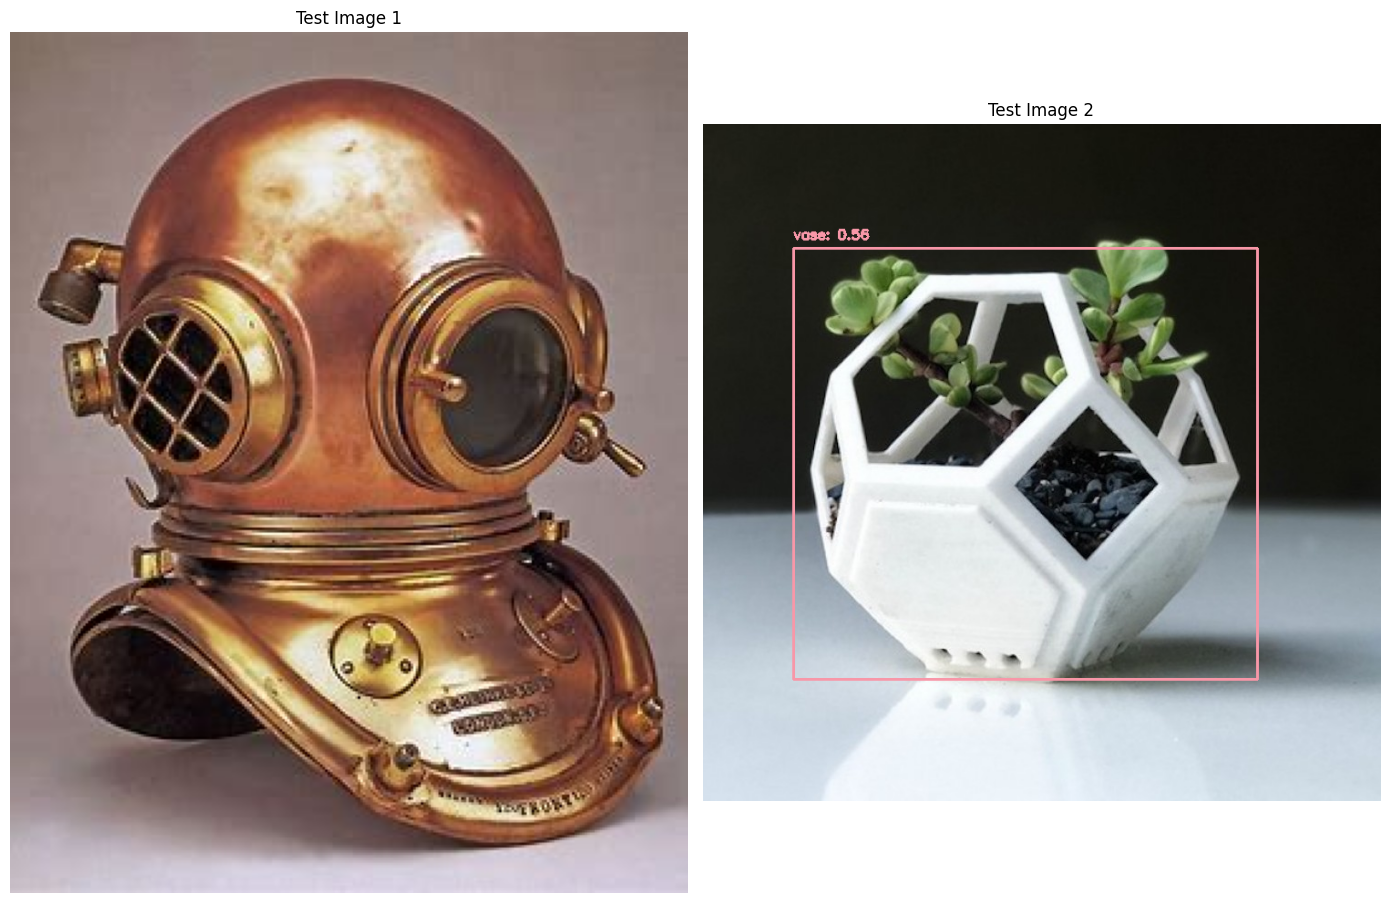

In [14]:
# List of image paths for testing
image_paths = [
    '/content/IMAGE4.jfif',
    '/content/IMAGE5.jpg',  # Corrected extension
]

# Visualization for multiple images
plt.figure(figsize=(14, 12))
for i, path in enumerate(image_paths, 1):
    # Load the image
    test_image = cv2.imread(path)
    if test_image is None:
        raise FileNotFoundError(f"Image not found at path: {path}")

    # Detect objects and draw bounding boxes
    output_image = detect_and_draw_boxes(test_image.copy())

    # Plot the image with detections
    plt.subplot(1, len(image_paths), i)
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Test Image {i}")

plt.tight_layout()
plt.show()


## TASK 6: PERFORMANCE ANALYSIS

In [18]:
#Import Libraries.
import time

#Function to run detection and measure performance.
def analyze_performance(image_paths):
    total_time = 0
    total_detections = 0
    results = []

    for path in image_paths:
        image = load_image(path)

        #Measure detection time.
        start_time = time.time()
        boxes, confidences, class_ids = detect_objects_yolo(image)
        detection_time = time.time() - start_time

        #Count detections.
        num_detections = len(boxes)

        #Update total metrics.
        total_time += detection_time
        total_detections += num_detections

        #Store results for this image.
        results.append({
            'image_path': path,
            'detection_time': detection_time,
            'num_detections': num_detections
        })

        print(f"Image: {path}")
        print(f"  Detection Time: {detection_time:.4f} seconds")
        print(f"  Number of Detections: {num_detections}")
        print("="*40)

    #Calculate averages.
    avg_time = total_time / len(image_paths)
    avg_detections = total_detections / len(image_paths)

    print("\nPerformance Summary:")
    print(f"Average Detection Time: {avg_time:.4f} seconds")
    print(f"Average Number of Detections: {avg_detections:.2f}")

    return results, avg_time, avg_detections

#Test images.
image_paths = [
    '/content/IMAGE5.jpg',
    '/content/IMAGE4.jfif',
    '/content/IMAGE6.jpg'
]

#Run performance analysis.
results, avg_time, avg_detections = analyze_performance(image_paths)

Image: /content/IMAGE5.jpg
  Detection Time: 0.9303 seconds
  Number of Detections: 1
Image: /content/IMAGE4.jfif
  Detection Time: 1.0925 seconds
  Number of Detections: 0
Image: /content/IMAGE6.jpg
  Detection Time: 1.4204 seconds
  Number of Detections: 0

Performance Summary:
Average Detection Time: 1.1478 seconds
Average Number of Detections: 0.33
